<a href="https://colab.research.google.com/github/afeef-shaikh/Heart-Disease-Classification/blob/main/Heart_Disease_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Classification**

####**Project Description:**
This project aims to predict the presence of heart disease using a deep neural network model built in PyTorch. The dataset contains various demographic and clinical attributes such as age, sex, chest pain types, cholesterol levels, and more

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('heart.csv')

## **Step 1. Data exploration:**

- Inspect the DataFrame: We examined the first few rows of the dataset, verified basic info (column datatypes, number of rows/columns), and reviewed descriptive statistics (mean, std, min, max, etc.).

- Explore Target Distribution: We looked at how the target variable (target) is distributed across the two classes (0 = No Heart Disease, 1 = Yes Heart Disease) and plotted this distribution.

- Visualize Key Features: We created histograms for numerical columns (e.g., age, trestbps, chol, thalach, oldpeak) to understand their individual distributions, including possible outliers or skew.

In [ ]:
#1.1 Inspect the dataframe

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nStatistical summary of the numerical columns:")
display(df.describe())


First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Statistical summary of the numerical columns:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Target variable distribution:
target
1    165
0    138
Name: count, dtype: int64


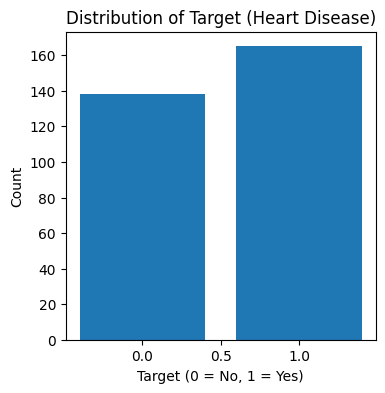

In [ ]:
# 1.2 Basic Data Exploration
# distribution of the target variable
target_counts = df['target'].value_counts()
print("\nTarget variable distribution:")
print(target_counts)

# Example: plot the target distribution
plt.figure(figsize=(4, 4))
plt.bar(target_counts.index, target_counts.values)
plt.title("Distribution of Target (Heart Disease)")
plt.xlabel("Target (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

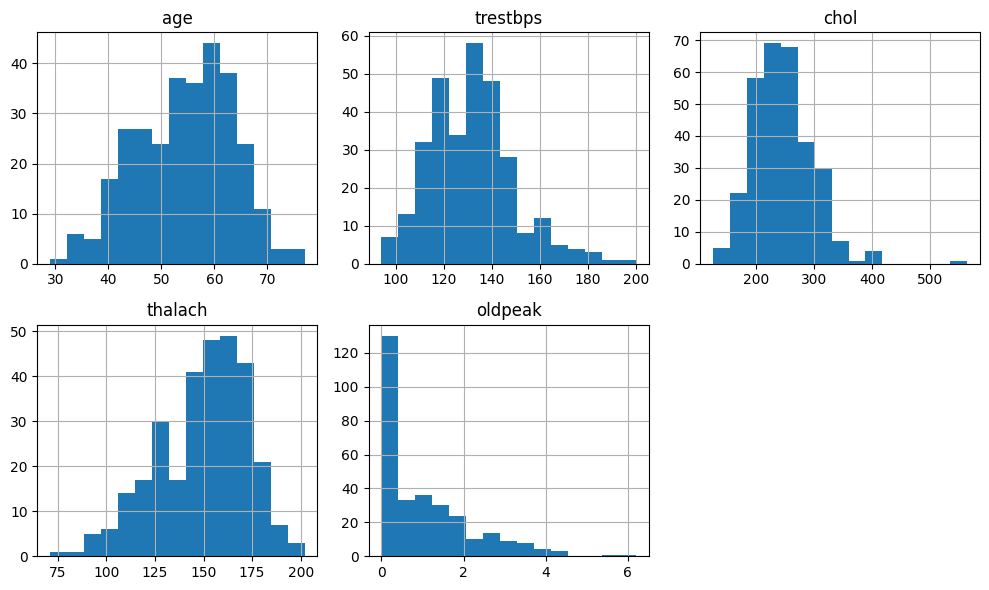

In [ ]:
#  plotting histograms for numerical features

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[num_cols].hist(bins=15, figsize=(10, 6), layout=(2, 3))
plt.tight_layout()
plt.show()

## **Step 2. Data preprocessing:**
- Handling Missing Values: We checked for any missing entries and replaced them with column means to ensure there are no NaN values in our dataset.

- Define Feature and Target Variables: We separated the target column as the label (y) and the remaining columns as our features (X).

- Train-Test Split: We split our dataset into training (70%) and testing (30%) sets. By stratifying on the target, we maintain similar class distributions in both sets.

- Min-Max Normalization: We applied MinMaxScaler to transform all feature values into the [0, 1] range. We fitted the scaler on the training data only, then used the same parameters to transform both the training and testing sets.


In [ ]:
# 2.1 Handling Missing Values

# Checking for missing values
missing_counts = df.isnull().sum()
print("Missing values:\n", missing_counts)

# If there are missing values, we fill or drop them
df.fillna(df.mean(numeric_only=True), inplace=True)


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# 2.2 Split data into X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# 2.3 Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,       # 30% for testing
    random_state=42,      # for reproducibility
    stratify=y            # ensures balanced classes in each split if classes are imbalanced
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (212, 13) (212,)
Test shape: (91, 13) (91,)


In [ ]:
# 2.4 Min-Max Normalization

# we  can apply the MinMaxScaler to scale our features to a [0, 1] range
scaler = MinMaxScaler()

# only fit  the scaler on the training data only
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  we can also onvert back to DataFrame for convenience
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# printign the results
print("\nAfter Min-Max Scaling:")
print("Train data sample:")
display(X_train_scaled.head())
print("Test data sample:")
display(X_test_scaled.head())


After Min-Max Scaling:
Train data sample:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.979167,0.0,0.666667,0.469388,0.250883,0.0,1.0,0.245614,0.0,0.177419,0.5,0.00,0.666667
1,0.291667,0.0,0.000000,0.387755,0.759717,1.0,0.0,0.421053,1.0,0.483871,0.5,0.00,1.000000
2,0.375000,1.0,0.666667,0.142857,0.413428,0.0,0.5,0.561404,0.0,0.000000,1.0,0.00,0.666667
3,0.458333,1.0,0.666667,0.061224,0.339223,0.0,0.5,0.482456,1.0,0.193548,0.5,0.00,0.666667
4,0.583333,1.0,0.000000,0.163265,0.738516,0.0,0.5,0.482456,1.0,0.483871,0.5,0.25,1.000000


Test data sample:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.520833,0.0,0.666667,0.142857,0.498233,0.0,0.0,0.692982,0.0,0.000000,1.0,0.00,0.666667
1,0.229167,1.0,0.000000,0.591837,0.342756,0.0,0.5,0.815789,0.0,0.000000,1.0,0.00,1.000000
2,0.625000,1.0,0.000000,0.163265,0.399293,0.0,0.0,0.473684,1.0,0.193548,0.5,0.25,1.000000
3,0.500000,1.0,0.000000,0.489796,0.353357,0.0,0.0,0.201754,1.0,0.000000,1.0,0.00,1.000000
4,0.666667,1.0,1.000000,0.408163,0.381625,0.0,0.5,0.500000,0.0,0.419355,0.5,0.50,0.666667


### **Convert the data to tensor**

In [ ]:
import torch

# Converting features to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32)

# Converting targets to PyTorch tensors and reshaping to column vectors
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

# Displaying the tensor data types and shapes
print("X_train_tensor dtype:", X_train_tensor.dtype)
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor dtype:", y_train_tensor.dtype)
print("y_train_tensor shape:", y_train_tensor.shape)


X_train_tensor dtype: torch.float32
X_train_tensor shape: torch.Size([212, 13])
y_train_tensor dtype: torch.float32
y_train_tensor shape: torch.Size([212, 1])


In [ ]:
y_train_tensor = y_train_tensor.view(-1, 1).float()
y_test_tensor = y_test_tensor.view(-1, 1).float()

In [ ]:
X_train_scaled.dtypes


,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
import numpy as np
X_array = X_train_scaled.to_numpy()
print(type(X_array))         # should be <class 'numpy.ndarray'>
print(X_array.shape)         # should be something like (rows, columns)
print(X_array.dtype)         # should be float64

X_train_tensor = torch.tensor(X_array, dtype=torch.float32)


<class 'numpy.ndarray'>
(212, 13)
float64


In [ ]:
try:
    X_train_tensor = torch.tensor(X_train_scaled.to_numpy(), dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)  # Ensure y_train is converted to numpy first
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)    # Ensure y_test is converted to numpy first
    print("All tensors created successfully!")
except Exception as e:
    print("Error:", e)


All tensors created successfully!


## **Step 3. Building classifiers:**
First Model has the following criteria:
- 2 layes
- 20 nodes in the hidden layer
- Activation function is ReLU

In [ ]:
class HDC(nn.Module):
    def __init__(self):
        super(HDC, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=20)
        self.relu = nn.ReLU()  # ReLU activation function
        self.layer_2 = nn.Linear(in_features=20, out_features=1)



    def forward(self, x):
        x = self.relu(self.layer_1(x))  # Apply ReLU activation after layer_1
        x = self.layer_2(x)  # Apply layer_2



        return x

model = HDC()

Second Model has the following criteria:
- 2 layes
- 20 nodes in the hidden layer
- Activation function is Sigmoid

In [ ]:
class HDC1(nn.Module):
    def __init__(self):
        super(HDC1, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=20)
        self.layer_2 = nn.Linear(in_features=20, out_features=1)
        self.sigmoid = nn.Sigmoid()  # Add sigmoid for binary output



    def forward(self, x):
        x = self.sigmoid(self.layer_1(x))  # Apply sigmoid activation after layer_1
        x = self.layer_2(x)  # Apply layer_2




        return x

model1 = HDC1()

Third Model has the following criteria:

- 2 layes
- 10 nodes in the hidden layer
- Activation function is ReLU

In [ ]:
class HDC2(nn.Module):
    def __init__(self):
        super(HDC2, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=10)
        self.relu = nn.ReLU()  # ReLU activation function
        self.layer_2 = nn.Linear(in_features=10, out_features=1)
        self.sigmoid = nn.Sigmoid()  # Add sigmoid for binary output



    def forward(self, x):
        x = self.relu(self.layer_1(x))  # Apply ReLU activation after layer_1
        x = self.layer_2(x)  # Apply layer_2



        return x

model2 = HDC2()

Forth Model has the following criteria:

- 2 layes
- 10 nodes in the hidden layer
- Activation function is Sigmoid

In [ ]:
class HDC3(nn.Module):
    def __init__(self):
        super(HDC3, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=10)
        self.relu = nn.ReLU()  # ReLU activation function
        self.layer_2 = nn.Linear(in_features=10, out_features=1)
        self.sigmoid = nn.Sigmoid()  # Add sigmoid for binary output



    def forward(self, x):
        x = self.sigmoid(self.layer_1(x))  # Apply ReLU activation after layer_1
        x = self.layer_2(x)  # Apply layer_2



        return x

model3 = HDC3()


Fifth Model has the following criteria:

- 3 layes
- 20 nodes in the hidden layer 1
- 10 nodes in the hidden layer 2
- Activation function is ReLU



In [ ]:
class HDC4(nn.Module):
    def __init__(self):
        super(HDC4, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=20)
        self.relu = nn.ReLU()  # ReLU activation function
        self.layer_2 = nn.Linear(in_features=20, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.sigmoid = nn.Sigmoid()  # Add sigmoid for binary output



    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)


        return x

model4 = HDC4()

Sixth Model has the following criteria:

- 3 layes
- 20 nodes in the hidden layer
- 10 nodes in the hidden layer 2
- Activation function is Sigmoid



In [ ]:
class HDC5(nn.Module):
    def __init__(self):
        super(HDC5, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=20)
        self.layer_2 = nn.Linear(in_features=20, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.sigmoid = nn.Sigmoid()  # Add sigmoid for binary output
        self.relu = nn.ReLU()  # ReLU activation function



    def forward(self, x):
        x = self.sigmoid(self.layer_1(x))
        x = self.sigmoid(self.layer_2(x))
        x = self.layer_3(x)


        return x

model5 = HDC5()

Seventh Model has the following criteria:

- 3 layes
- 10 nodes in the hidden layer 1
- 5 nodes in the hidden layer 2
- Activation function is ReLu

In [ ]:
class HDC6(nn.Module):
    def __init__(self):
        super(HDC6, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=10)
        self.relu = nn.ReLU()  # ReLU activation function
        self.layer_2 = nn.Linear(in_features=10, out_features=5)
        self.layer_3 = nn.Linear(in_features=5, out_features=1)
        self.sigmoid = nn.Sigmoid()  # Add sigmoid for binary output



    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)


        return x

model6 = HDC6()

Eighth Model has the following criteria:

- 3 layes
- 10 nodes in the hidden layer 1
- 5 nodes in the hidden layer 2
- Activation function is Sigmoid

In [ ]:
class HDC7(nn.Module):
    def __init__(self):
        super(HDC7, self).__init__()
        self.layer_1 = nn.Linear(in_features=X_train_tensor.shape[1], out_features=10)
        self.relu = nn.ReLU()  # ReLU activation function
        self.layer_2 = nn.Linear(in_features=10, out_features=5)
        self.layer_3 = nn.Linear(in_features=5, out_features=1)
        self.sigmoid = nn.Sigmoid()  # Add sigmoid for binary output



    def forward(self, x):
        x = self.sigmoid(self.layer_1(x))
        x = self.sigmoid(self.layer_2(x))
        x = self.layer_3(x)



        return x

model7 = HDC7()

## **Checking the criteria of the models:**

In [ ]:
model


HDC(
  (layer_1): Linear(in_features=13, out_features=20, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=20, out_features=1, bias=True)
)

In [ ]:
model1



HDC1(
  (layer_1): Linear(in_features=13, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
model2


HDC2(
  (layer_1): Linear(in_features=13, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
model3


HDC3(
  (layer_1): Linear(in_features=13, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
model4


HDC4(
  (layer_1): Linear(in_features=13, out_features=20, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=20, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
model5

HDC5(
  (layer_1): Linear(in_features=13, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)

In [ ]:
model6

HDC6(
  (layer_1): Linear(in_features=13, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
model7

HDC7(
  (layer_1): Linear(in_features=13, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

## **Step 4. Setting the Loss Function and accuracy function:**

For our model I will try to test Mean absolute error and binary loss functions which are more relevent

In [ ]:

loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = sigmoid built-in
loss_fn_MEA = nn.L1Loss()



Also adding an Accuracy function

In [ ]:
def accuracy_fn(y_true, y_pred_logits):
    y_pred_probs = torch.sigmoid(y_pred_logits)      # Convert logits to probabilities
    y_pred_class = (y_pred_probs > 0.5).float()       # Binary threshold
    correct = (y_pred_class == y_true).sum().item()
    return correct / len(y_true) * 100

## **Step 5. Training and Testing each model with 100 and 200 epochs:**

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model = HDC()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model.train()  # Set the model to training mode
    # Forward pass
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6810 | Train Accuracy: 45.75472% | Test Accuracy: 46.15385% | Test Loss: 0.6826
Epoch 0 | Train LossMEA: 0.7019 | Train Accuracy: 45.75472% | Test Accuracy: 46.15385% | Test LossMEA: 0.6845

Epoch 10 | Train Loss: 0.6610 | Train Accuracy: 79.71698% | Test Accuracy: 71.42857% | Test Loss: 0.6662
Epoch 10 | Train LossMEA: 0.5729 | Train Accuracy: 79.71698% | Test Accuracy: 71.42857% | Test LossMEA: 0.5738

Epoch 20 | Train Loss: 0.6439 | Train Accuracy: 79.24528% | Test Accuracy: 72.52747% | Test Loss: 0.6519
Epoch 20 | Train LossMEA: 0.5323 | Train Accuracy: 79.24528% | Test Accuracy: 72.52747% | Test LossMEA: 0.5461

Epoch 30 | Train Loss: 0.6253 | Train Accuracy: 78.77358% | Test Accuracy: 71.42857% | Test Loss: 0.6367
Epoch 30 | Train LossMEA: 0.5227 | Train Accuracy: 78.77358% | Test Accuracy: 71.42857% | Test LossMEA: 0.5407

Epoch 40 | Train Loss: 0.6050 | Train Accuracy: 80.66038% | Test Accuracy: 71.42857% | Test Loss: 0.6201
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model = HDC()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model.train()  # Set the model to training mode
    # Forward pass
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6810 | Train Accuracy: 45.75472% | Test Accuracy: 46.15385% | Test Loss: 0.6826
Epoch 0 | Train LossMEA: 0.7019 | Train Accuracy: 45.75472% | Test Accuracy: 46.15385% | Test LossMEA: 0.6845

Epoch 10 | Train Loss: 0.6610 | Train Accuracy: 79.71698% | Test Accuracy: 71.42857% | Test Loss: 0.6662
Epoch 10 | Train LossMEA: 0.5729 | Train Accuracy: 79.71698% | Test Accuracy: 71.42857% | Test LossMEA: 0.5738

Epoch 20 | Train Loss: 0.6439 | Train Accuracy: 79.24528% | Test Accuracy: 72.52747% | Test Loss: 0.6519
Epoch 20 | Train LossMEA: 0.5323 | Train Accuracy: 79.24528% | Test Accuracy: 72.52747% | Test LossMEA: 0.5461

Epoch 30 | Train Loss: 0.6253 | Train Accuracy: 78.77358% | Test Accuracy: 71.42857% | Test Loss: 0.6367
Epoch 30 | Train LossMEA: 0.5227 | Train Accuracy: 78.77358% | Test Accuracy: 71.42857% | Test LossMEA: 0.5407

Epoch 40 | Train Loss: 0.6050 | Train Accuracy: 80.66038% | Test Accuracy: 71.42857% | Test Loss: 0.6201
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model1 = HDC1()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model1.train()  # Set the model to training mode
    # Forward pass
    outputs = model1(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model1(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.7593 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7427
Epoch 0 | Train LossMEA: 1.1628 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 1.0519

Epoch 10 | Train Loss: 0.6840 | Train Accuracy: 75.00000% | Test Accuracy: 68.13187% | Test Loss: 0.6844
Epoch 10 | Train LossMEA: 0.5360 | Train Accuracy: 75.00000% | Test Accuracy: 68.13187% | Test LossMEA: 0.5339

Epoch 20 | Train Loss: 0.6797 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6805
Epoch 20 | Train LossMEA: 0.5105 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5187

Epoch 30 | Train Loss: 0.6780 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6791
Epoch 30 | Train LossMEA: 0.5053 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5141

Epoch 40 | Train Loss: 0.6764 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6777
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model1 = HDC1()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)


for epoch in range(num_epochs):
  #Training
    model1.train()  # Set the model to training mode
    # Forward pass
    outputs = model1(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model1(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.7593 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7427
Epoch 0 | Train LossMEA: 1.1628 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 1.0519

Epoch 10 | Train Loss: 0.6840 | Train Accuracy: 75.00000% | Test Accuracy: 68.13187% | Test Loss: 0.6844
Epoch 10 | Train LossMEA: 0.5360 | Train Accuracy: 75.00000% | Test Accuracy: 68.13187% | Test LossMEA: 0.5339

Epoch 20 | Train Loss: 0.6797 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6805
Epoch 20 | Train LossMEA: 0.5105 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5187

Epoch 30 | Train Loss: 0.6780 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6791
Epoch 30 | Train LossMEA: 0.5053 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5141

Epoch 40 | Train Loss: 0.6764 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6777
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model2 = HDC2()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model2.train()  # Set the model to training mode
    # Forward pass
    outputs = model2(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model2(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6975 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6969
Epoch 0 | Train LossMEA: 0.5473 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5536

Epoch 10 | Train Loss: 0.6912 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6916
Epoch 10 | Train LossMEA: 0.5350 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5430

Epoch 20 | Train Loss: 0.6858 | Train Accuracy: 55.18868% | Test Accuracy: 54.94505% | Test Loss: 0.6870
Epoch 20 | Train LossMEA: 0.5245 | Train Accuracy: 55.18868% | Test Accuracy: 54.94505% | Test LossMEA: 0.5338

Epoch 30 | Train Loss: 0.6806 | Train Accuracy: 57.07547% | Test Accuracy: 57.14286% | Test Loss: 0.6826
Epoch 30 | Train LossMEA: 0.5152 | Train Accuracy: 57.07547% | Test Accuracy: 57.14286% | Test LossMEA: 0.5253

Epoch 40 | Train Loss: 0.6749 | Train Accuracy: 58.96226% | Test Accuracy: 58.24176% | Test Loss: 0.6776
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model2 = HDC2()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)


for epoch in range(num_epochs):
  #Training
    model2.train()  # Set the model to training mode
    # Forward pass
    outputs = model2(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model2(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6975 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6969
Epoch 0 | Train LossMEA: 0.5473 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5536

Epoch 10 | Train Loss: 0.6912 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6916
Epoch 10 | Train LossMEA: 0.5350 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5430

Epoch 20 | Train Loss: 0.6858 | Train Accuracy: 55.18868% | Test Accuracy: 54.94505% | Test Loss: 0.6870
Epoch 20 | Train LossMEA: 0.5245 | Train Accuracy: 55.18868% | Test Accuracy: 54.94505% | Test LossMEA: 0.5338

Epoch 30 | Train Loss: 0.6806 | Train Accuracy: 57.07547% | Test Accuracy: 57.14286% | Test Loss: 0.6826
Epoch 30 | Train LossMEA: 0.5152 | Train Accuracy: 57.07547% | Test Accuracy: 57.14286% | Test LossMEA: 0.5253

Epoch 40 | Train Loss: 0.6749 | Train Accuracy: 58.96226% | Test Accuracy: 58.24176% | Test Loss: 0.6776
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model3 = HDC3()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model3.train()  # Set the model to training mode
    # Forward pass
    outputs = model3(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model3(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6886 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6860
Epoch 0 | Train LossMEA: 0.5214 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5239

Epoch 10 | Train Loss: 0.6871 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6849
Epoch 10 | Train LossMEA: 0.5216 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5246

Epoch 20 | Train Loss: 0.6858 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6840
Epoch 20 | Train LossMEA: 0.5202 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5236

Epoch 30 | Train Loss: 0.6846 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6830
Epoch 30 | Train LossMEA: 0.5181 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5219

Epoch 40 | Train Loss: 0.6833 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6819
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model3 = HDC3()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model3.train()  # Set the model to training mode
    # Forward pass
    outputs = model3(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model3(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6886 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6860
Epoch 0 | Train LossMEA: 0.5214 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5239

Epoch 10 | Train Loss: 0.6871 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6849
Epoch 10 | Train LossMEA: 0.5216 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5246

Epoch 20 | Train Loss: 0.6858 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6840
Epoch 20 | Train LossMEA: 0.5202 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5236

Epoch 30 | Train Loss: 0.6846 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6830
Epoch 30 | Train LossMEA: 0.5181 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5219

Epoch 40 | Train Loss: 0.6833 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6819
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model4 = HDC4()
optimizer = torch.optim.SGD(model4.parameters(), lr=0.1)


for epoch in range(num_epochs):
  #Training
    model4.train()  # Set the model to training mode
    # Forward pass
    outputs = model4(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model4(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6963 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.6969
Epoch 0 | Train LossMEA: 0.6402 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.6373

Epoch 10 | Train Loss: 0.6896 | Train Accuracy: 59.90566% | Test Accuracy: 56.04396% | Test Loss: 0.6905
Epoch 10 | Train LossMEA: 0.5639 | Train Accuracy: 59.90566% | Test Accuracy: 56.04396% | Test LossMEA: 0.5641

Epoch 20 | Train Loss: 0.6845 | Train Accuracy: 62.26415% | Test Accuracy: 58.24176% | Test Loss: 0.6856
Epoch 20 | Train LossMEA: 0.5257 | Train Accuracy: 62.26415% | Test Accuracy: 58.24176% | Test LossMEA: 0.5339

Epoch 30 | Train Loss: 0.6801 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6816
Epoch 30 | Train LossMEA: 0.5142 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5239

Epoch 40 | Train Loss: 0.6758 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6778
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model4 = HDC4()
optimizer = torch.optim.SGD(model4.parameters(), lr=0.1)


for epoch in range(num_epochs):
  #Training
    model4.train()  # Set the model to training mode
    # Forward pass
    outputs = model4(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model4(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6963 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.6969
Epoch 0 | Train LossMEA: 0.6402 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.6373

Epoch 10 | Train Loss: 0.6896 | Train Accuracy: 59.90566% | Test Accuracy: 56.04396% | Test Loss: 0.6905
Epoch 10 | Train LossMEA: 0.5639 | Train Accuracy: 59.90566% | Test Accuracy: 56.04396% | Test LossMEA: 0.5641

Epoch 20 | Train Loss: 0.6845 | Train Accuracy: 62.26415% | Test Accuracy: 58.24176% | Test Loss: 0.6856
Epoch 20 | Train LossMEA: 0.5257 | Train Accuracy: 62.26415% | Test Accuracy: 58.24176% | Test LossMEA: 0.5339

Epoch 30 | Train Loss: 0.6801 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6816
Epoch 30 | Train LossMEA: 0.5142 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5239

Epoch 40 | Train Loss: 0.6758 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6778
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model5 = HDC5()
optimizer = torch.optim.SGD(model5.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model5.train()  # Set the model to training mode
    # Forward pass
    outputs = model5(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model5(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6902 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6893
Epoch 0 | Train LossMEA: 0.5336 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5386

Epoch 10 | Train Loss: 0.6897 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6887
Epoch 10 | Train LossMEA: 0.5305 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5353

Epoch 20 | Train Loss: 0.6896 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6885
Epoch 20 | Train LossMEA: 0.5292 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5339

Epoch 30 | Train Loss: 0.6896 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6885
Epoch 30 | Train LossMEA: 0.5286 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5333

Epoch 40 | Train Loss: 0.6896 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6884
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model5 = HDC5()
optimizer = torch.optim.SGD(model5.parameters(), lr=0.1)


for epoch in range(num_epochs):
  #Training
    model5.train()  # Set the model to training mode
    # Forward pass
    outputs = model5(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model5(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.6902 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6893
Epoch 0 | Train LossMEA: 0.5336 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5386

Epoch 10 | Train Loss: 0.6897 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6887
Epoch 10 | Train LossMEA: 0.5305 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5353

Epoch 20 | Train Loss: 0.6896 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6885
Epoch 20 | Train LossMEA: 0.5292 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5339

Epoch 30 | Train Loss: 0.6896 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6885
Epoch 30 | Train LossMEA: 0.5286 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5333

Epoch 40 | Train Loss: 0.6896 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6884
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model6 = HDC6()
optimizer = torch.optim.SGD(model6.parameters(), lr=0.1)


for epoch in range(num_epochs):
  #Training
    model6.train()  # Set the model to training mode
    # Forward pass
    outputs = model6(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model6(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.7292 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7293
Epoch 0 | Train LossMEA: 0.9451 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.9340

Epoch 10 | Train Loss: 0.7096 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7104
Epoch 10 | Train LossMEA: 0.7863 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.7808

Epoch 20 | Train Loss: 0.6988 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7000
Epoch 20 | Train LossMEA: 0.6686 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.6672

Epoch 30 | Train Loss: 0.6929 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.6942
Epoch 30 | Train LossMEA: 0.5825 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.5841

Epoch 40 | Train Loss: 0.6895 | Train Accuracy: 58.01887% | Test Accuracy: 53.84615% | Test Loss: 0.6908
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model6 = HDC6()
optimizer = torch.optim.SGD(model6.parameters(), lr=0.1)


for epoch in range(num_epochs):
  #Training
    model6.train()  # Set the model to training mode
    # Forward pass
    outputs = model6(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model6(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.7292 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7293
Epoch 0 | Train LossMEA: 0.9451 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.9340

Epoch 10 | Train Loss: 0.7096 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7104
Epoch 10 | Train LossMEA: 0.7863 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.7808

Epoch 20 | Train Loss: 0.6988 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7000
Epoch 20 | Train LossMEA: 0.6686 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.6672

Epoch 30 | Train Loss: 0.6929 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.6942
Epoch 30 | Train LossMEA: 0.5825 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.5841

Epoch 40 | Train Loss: 0.6895 | Train Accuracy: 58.01887% | Test Accuracy: 53.84615% | Test Loss: 0.6908
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 200
torch.manual_seed(42)
model7 = HDC7()
optimizer = torch.optim.SGD(model7.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model7.train()  # Set the model to training mode
    # Forward pass
    outputs = model7(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model7(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.7229 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7212
Epoch 0 | Train LossMEA: 0.8900 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.8659

Epoch 10 | Train Loss: 0.6989 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.6984
Epoch 10 | Train LossMEA: 0.6494 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.6397

Epoch 20 | Train Loss: 0.6920 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6915
Epoch 20 | Train LossMEA: 0.5399 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5458

Epoch 30 | Train Loss: 0.6900 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6893
Epoch 30 | Train LossMEA: 0.5339 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5393

Epoch 40 | Train Loss: 0.6894 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6885
Epoch 40 | Train LossMEA: 0.5

In [ ]:
num_epochs = 100
torch.manual_seed(42)
model7 = HDC7()
optimizer = torch.optim.SGD(model7.parameters(), lr=0.1)

for epoch in range(num_epochs):
  #Training
    model7.train()  # Set the model to training mode
    # Forward pass
    outputs = model7(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    lossMEA = loss_fn_MEA(outputs, y_train_tensor)

    #Calculating Accuracy
    acc = accuracy_fn(y_true = y_train_tensor,
                      y_pred_logits = outputs)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model7(X_test_tensor)
      #Calculating Accuracy
      acc_test = accuracy_fn(y_true = y_test_tensor,
                             y_pred_logits = test_pred)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test_tensor)
      test_lossMEA = loss_fn_MEA(test_pred, y_test_tensor)


    if (epoch) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch} | Train Loss: {loss.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test Loss: {test_loss.item():.4f}')
        print(f'Epoch {epoch} | Train LossMEA: {lossMEA.item():.4f} | Train Accuracy: {acc:.5f}% | Test Accuracy: {acc_test:.5f}% | Test LossMEA: {test_lossMEA.item():.4f}\n')

Epoch 0 | Train Loss: 0.7229 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.7212
Epoch 0 | Train LossMEA: 0.8900 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.8659

Epoch 10 | Train Loss: 0.6989 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test Loss: 0.6984
Epoch 10 | Train LossMEA: 0.6494 | Train Accuracy: 45.75472% | Test Accuracy: 45.05495% | Test LossMEA: 0.6397

Epoch 20 | Train Loss: 0.6920 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6915
Epoch 20 | Train LossMEA: 0.5399 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5458

Epoch 30 | Train Loss: 0.6900 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6893
Epoch 30 | Train LossMEA: 0.5339 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test LossMEA: 0.5393

Epoch 40 | Train Loss: 0.6894 | Train Accuracy: 54.24528% | Test Accuracy: 54.94505% | Test Loss: 0.6885
Epoch 40 | Train LossMEA: 0.5

In [ ]:
from tabulate import tabulate  # Make sure to install via: pip install tabulate

# summarizing all the experiments above

experiments = [
    {"name": "2 layers, 20 nodes, ReLU, 200 epochs", "hidden_layers": [20],         "activation": "relu",    "num_epochs": 200},
    {"name": "2 layers, 20 nodes, Sigmoid, 200 epochs", "hidden_layers": [20],         "activation": "sigmoid", "num_epochs": 200},
    {"name": "2 layers, 10 nodes, ReLU, 200 epochs", "hidden_layers": [10],         "activation": "relu",    "num_epochs": 200},
    {"name": "2 layers, 10 nodes, Sigmoid, 200 epochs", "hidden_layers": [10],         "activation": "sigmoid", "num_epochs": 200},
    {"name": "3 layers, [20, 10] nodes, ReLU, 200 epochs", "hidden_layers": [20, 10],  "activation": "relu",    "num_epochs": 200},
    {"name": "3 layers, [20, 10] nodes, Sigmoid, 200 epochs", "hidden_layers": [20, 10],  "activation": "sigmoid", "num_epochs": 200},
    {"name": "3 layers, [10, 5] nodes, ReLU, 200 epochs", "hidden_layers": [10, 5],   "activation": "relu",    "num_epochs": 200},
    {"name": "3 layers, [10, 5] nodes, Sigmoid, 200 epochs", "hidden_layers": [10, 5],   "activation": "sigmoid", "num_epochs": 200},

    # Sensitivity analysis for number of epochs (same architecture, different epochs)
    {"name": "3 layers, [20, 10] nodes, ReLU, 100 epochs", "hidden_layers": [20, 10], "activation": "relu", "num_epochs": 100},
    {"name": "3 layers, [20, 10] nodes, ReLU, 200 epochs", "hidden_layers": [20, 10], "activation": "relu", "num_epochs": 200},
]

results = []
for exp in experiments:
    # For reproducibility, reset the seed for each experiment
    torch.manual_seed(42)
    model = FeedForwardNet(input_dim=X_train_tensor.shape[1],
                           hidden_layers=exp["hidden_layers"],
                           activation=exp["activation"])
    optimizer = optim.SGD(model.parameters(), lr=0.1)

    print("\nTraining Experiment:", exp["name"])
    train_model(model, optimizer, loss_fn, X_train_tensor, y_train_tensor,
                num_epochs=exp["num_epochs"], print_every=50)

    # Evaluate on test data
    test_accuracy, test_auc, test_precision, test_recall = evaluate_model(model, X_test_tensor, y_test_tensor)
    results.append({
        "Experiment": exp["name"],
        "Epochs": exp["num_epochs"],
        "Accuracy (%)": round(test_accuracy, 2),
        "AUC": round(test_auc, 4),
        "Precision": round(test_precision, 4),
        "Recall": round(test_recall, 4)
    })

# ----- Display Results in a Summary Table -----
results_df = pd.DataFrame(results)

# Print a nicely formatted table using tabulate
print("\nSummary of all Experiments:")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", showindex=False))



Training Experiment: 2 layers, 20 nodes, ReLU, 200 epochs
Epoch   0 | Loss: 0.6810 | Train Acc: 45.75%
Epoch  50 | Loss: 0.5824 | Train Acc: 80.19%
Epoch 100 | Loss: 0.4669 | Train Acc: 80.66%
Epoch 150 | Loss: 0.3996 | Train Acc: 82.08%

Training Experiment: 2 layers, 20 nodes, Sigmoid, 200 epochs
Epoch   0 | Loss: 0.7593 | Train Acc: 45.75%
Epoch  50 | Loss: 0.6747 | Train Acc: 54.25%
Epoch 100 | Loss: 0.6647 | Train Acc: 55.19%
Epoch 150 | Loss: 0.6512 | Train Acc: 65.57%

Training Experiment: 2 layers, 10 nodes, ReLU, 200 epochs
Epoch   0 | Loss: 0.6975 | Train Acc: 54.25%
Epoch  50 | Loss: 0.6678 | Train Acc: 66.51%
Epoch 100 | Loss: 0.6019 | Train Acc: 79.72%
Epoch 150 | Loss: 0.4972 | Train Acc: 80.66%

Training Experiment: 2 layers, 10 nodes, Sigmoid, 200 epochs
Epoch   0 | Loss: 0.6886 | Train Acc: 54.25%
Epoch  50 | Loss: 0.6820 | Train Acc: 54.25%
Epoch 100 | Loss: 0.6748 | Train Acc: 54.25%
Epoch 150 | Loss: 0.6654 | Train Acc: 54.72%

Training Experiment: 3 layers, [20, 1